In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

zomato_dataframe = pd.read_csv('zomato-data.csv')
zomato_dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
# function to modify rate to remove the denominator
def modify_rate(rate: int):
    rate = str(rate)
    rate = rate.split('/')
    rate = rate[0]
    return float(rate)

new_rates_column = []
for rate in zomato_dataframe['rate']:
    new_rates_column.append(modify_rate(rate))
zomato_dataframe['rate'] = new_rates_column

zomato_dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
zomato_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

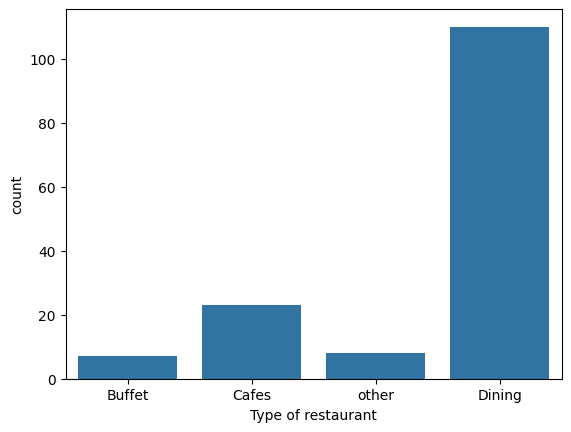

In [5]:
sb.countplot(x = zomato_dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

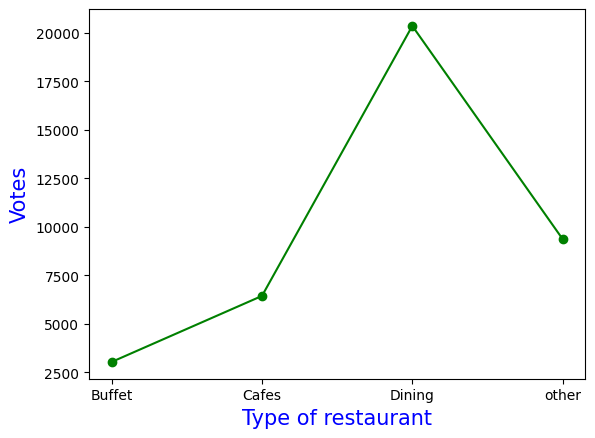

In [7]:
grouped_data_values = zomato_dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data_values})
plt.plot(result, c = "green", marker = "o")
plt.xlabel("Type of restaurant", c = "blue", size = 15)
plt.ylabel("Votes", c = "blue", size = 15)

In [8]:
max_num_votes = zomato_dataframe['votes'].max()
restaurant_with_max_num_votes = zomato_dataframe.loc[zomato_dataframe['votes'] == max_num_votes, 'name']
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_num_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

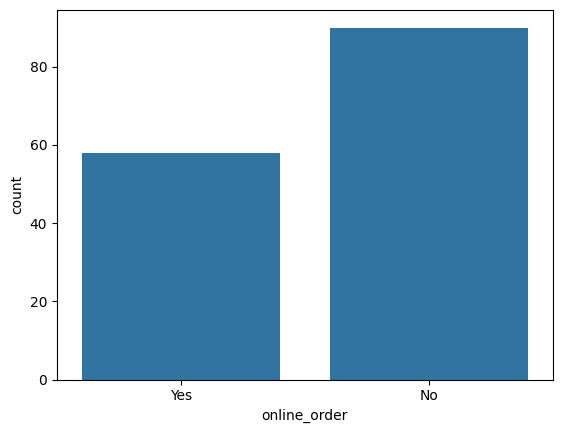

In [10]:
sb.countplot(x = zomato_dataframe['online_order'])

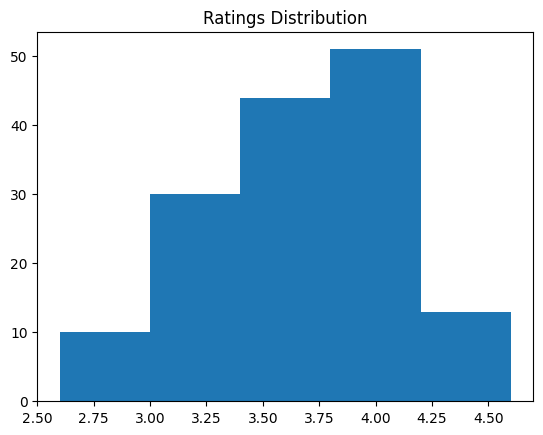

In [11]:
plt.hist(zomato_dataframe['rate'], bins = 5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

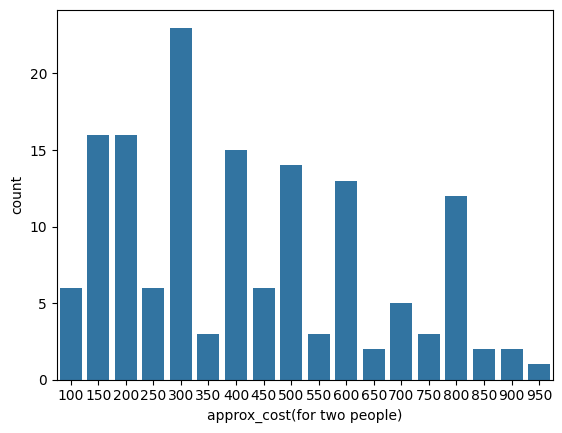

In [12]:
couple_data = zomato_dataframe['approx_cost(for two people)']
sb.countplot(x = couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

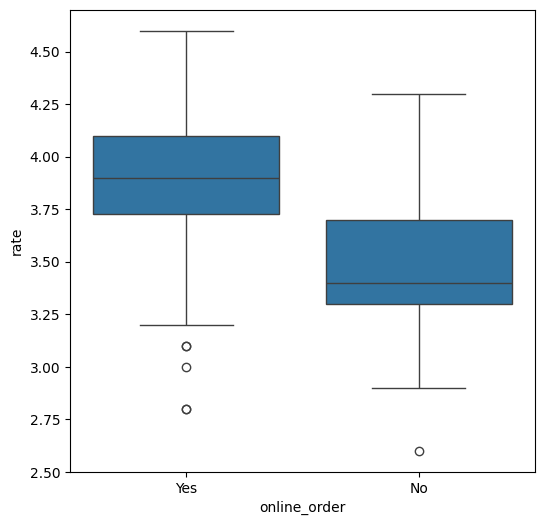

In [13]:
plt.figure(figsize = (6,6))
sb.boxplot(x = 'online_order', y = 'rate', data = zomato_dataframe)

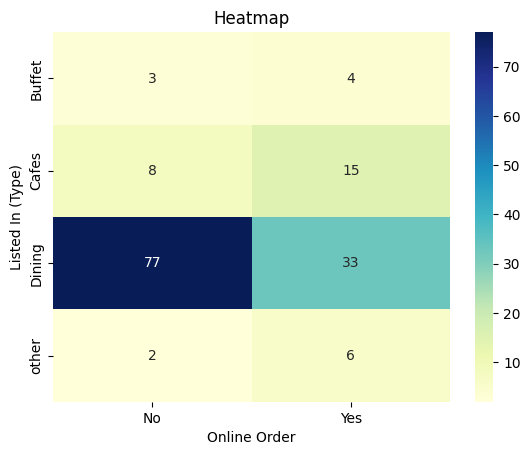

In [14]:
pivot_table = zomato_dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sb.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [15]:
print("Final conclusion: Dining restaurants mainly take orders in person, while cafes receive most orders online. This indicates that customers tend to order directly at restaurants but favor online ordering when visiting cafes.")

Final conclusion: Dining restaurants mainly take orders in person, while cafes receive most orders online. This indicates that customers tend to order directly at restaurants but favor online ordering when visiting cafes.
